In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '/home/swei20/PIML/PIMLgrid/'
import sys
sys.path.insert(0, PROJECT_PATH)
[sys.path.append(i) for i in ['.', '..']]

[None, None]

In [5]:
import os
env_vars = !cat /home/swei20/PIML/PIMLspec/.env
for var in env_vars:
    key, value = var.split('=')
    os.environ[key] = value

In [6]:
import numpy as np
import copy
import matplotlib.pyplot as plt


In [5]:
from test.dataloader import TestDataLoader

In [17]:
from grid.interface.gateway.gridprocessIF import StellarGridProcessIF

In [18]:
PIF = StellarGridProcessIF()

In [22]:
PARAM = { "OBJECT": {"PATH": "/home/swei20/PIML/PIMLgrid/test/testdata/grid.h5"},
         "OP": {"box_name": "R"},
        "MODEL": {"interp" : {"type": "RBF"}}}

In [23]:
PIF.interact(PARAM)

In [24]:
PIF.Object.__dict__

{'coord': array([[-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01, -2.50e-01],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  0.00e+00],
        [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  2.50e-01],
        ...,
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  0.00e+00],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  2.50e-01],
        [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  5.00e-01]]),
 'value': array([[14.29471548, 14.28819808, 14.28951243, ..., 13.93229754,
         13.94421155, 13.93452839],
        [14.29701653, 14.29037734, 14.29173853, ..., 13.93408439,
         13.94602114, 13.93632898],
        [14.29974988, 14.29293037, 14.29435623, ..., 13.936134  ,
         13.94811652, 13.93835631],
        ...,
        [15.06392408, 15.04008567, 15.01383243, ..., 14.58632686,
         14.57220045, 14.55279423],
        [15.06983231, 15.04513941, 15.01968634, ..., 14.59130168,
         14.57697505, 14.55772406],
        [15.07741448, 15.05129884, 15.02723127, ..., 1

In [ ]:
PIF.Object.

In [27]:
        PHYTICK = [0.25, 250, 0.5, 0.25, 0.25]


In [28]:
def eval_interpolator(Object, axis = 1):


In [32]:
Object = PIF.Object
axis=1

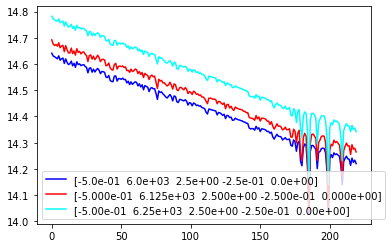

In [36]:
pmt0 = Object.box["mid"]
pmt2 = np.copy(pmt0)
pmt2[axis] += PHYTICK[axis]
pmt1 = 0.5 * (pmt0 + pmt2)

flux0 = Object.get_coord_value(pmt0)
flux2 = Object.get_coord_value(pmt2)
flux1 = Object.interpolator(pmt1)

wave = np.arange(len(flux0))
plt.plot(wave, flux0, label= pmt0, c='b')
plt.plot(wave, flux1, label = pmt1, c='r')
plt.plot(wave, flux2, label = pmt2, c='cyan')
plt.legend()

In [35]:
flux0.shape

(220,)

In [29]:
eval_interpolator(PIF.Object)

TypeError: arange: scalar arguments expected instead of a tuple.